In [7]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
from textblob import TextBlob

In [4]:
pip install WordCloud


  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 3.4 MB/s eta 0:00:01
   --------------------- ------------------ 163.8/300.2 kB 1.4 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 929.2 kB/s eta 0:00:00


In [5]:
pip install TextBlob


  Obtaining dependency information for TextBlob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 109.3 kB/s eta 0:00:06
   -- ------------------------------------ 41.0/626.3 kB 109.3 kB/s eta 0:00:06
   -- ------------------------------------ 41.0/626.3 kB 109.3 kB/s eta 0:00:06
   -- ----------

In [9]:
df = pd.read_csv("E:\\Gaurav\\BIA\\Capstone Project\\all-data.csv",encoding='ISO-8859-1')

In [10]:
df_1 = df

In [11]:
df_1.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


As form above data doesn't have header we have to create a header for the data

In [12]:
header = ['expression','Comment']

In [13]:
df_1.columns = header

In [14]:
df_1.head()

,expression,Comment
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


# Feature Extraction and Data Cleaning

In [15]:
def clean_text(text):
    text = text.lower()
    return text

df_1['Comment'] = df_1['Comment'].apply(clean_text)

Converting the whole string of data into lower case

In [16]:
df_1.head()

,expression,Comment
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company 's updated strategy f...
4,positive,financing of aspocomp 's growth aspocomp is ag...


In [17]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
def remove_stop(text):# "Hey Hi there I am anil"
    filtered = []
    tokenized_word = word_tokenize(text) #[hey,hi,there,i,am,anil]
    for each_word in tokenized_word:
        if each_word not in stop_words:
            filtered.append(each_word)   #[hey,hi,i,anil]
    return(" ".join(filtered))

In [19]:
df_1['Comment'] = df['Comment'].apply(remove_stop)

Removing the Stopwords such as and,the,etc.

In [20]:
df_1.head()

,expression,Comment
0,neutral,technopolis plans develop stages area less 100...
1,negative,international electronic industry company elco...
2,positive,new production plant company would increase ca...
3,positive,according company 's updated strategy years 20...
4,positive,financing aspocomp 's growth aspocomp aggressi...


In [21]:
def punctuation_removal(del_punctuation):
    clean_list = [i for i in del_punctuation if i not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [22]:
df_1["Comment"] = df_1['Comment'].apply(punctuation_removal)

Removing Punctuation such as :, and etc 

In [23]:
df_1.head()

,expression,Comment
0,neutral,technopolis plans develop stages area less 100...
1,negative,international electronic industry company elco...
2,positive,new production plant company would increase ca...
3,positive,according company s updated strategy years 200...
4,positive,financing aspocomp s growth aspocomp aggressiv...


In [24]:
import re
def update(item):
    pattern = r'\b(20)\d{2}\b'
    match = re.search(pattern, item)
    if match:
        return match.group(0)
    else:
        return '2009'
df_1['year'] = df_1['Comment'].apply(update)

Extracting the year of the article given in the comment itself

In [25]:
df_1.head()

,expression,Comment,year
0,neutral,technopolis plans develop stages area less 100...,2009
1,negative,international electronic industry company elco...,2009
2,positive,new production plant company would increase ca...,2009
3,positive,according company s updated strategy years 200...,2009
4,positive,financing aspocomp s growth aspocomp aggressiv...,2009


Joining all comment into single variable

In [26]:
text = list(df_1['Comment'].unique())

In [27]:
texts = ' '.join(text)
texts = texts.split(" ")
texts = list(set(texts))

In [57]:
len(texts)

11131

In [29]:
df_2 = pd.DataFrame(texts)

In [30]:
df_2.rename(columns = {0:'words'},inplace = True)

In [31]:
df_2.head()

,words
0,
1,tacked
2,54
3,catalysts
4,surpass


In [33]:
paragraph = ' '.join(df['Comment'])

In [34]:
paragraph

'technopolis plans develop stages area less 100000 square meters order host companies working computer technologies telecommunications  statement said  international electronic industry company elcoteq laid tens employees tallinn facility  contrary earlier layoffs company contracted ranks office workers  daily postimees reported  new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability  according company s updated strategy years 20092012  basware targets longterm net sales growth range 20  40  operating profit margin 10  20  net sales  financing aspocomp s growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs  last quarter 2010  componenta s net sales doubled eur131m eur76m period year earlier  moved zero pretax profit pretax loss eur7m  third quarter 2010  net sales increased 52  eur 2055 mn  operating pro

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

def get_top_words(paragraph, num_top_words=10):
    
    # Tokenize the paragraph into words
    words = word_tokenize(paragraph.lower())
    
    # Remove punctuation
    words = [word for word in words if word.isalnum()]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Count word frequencies
    word_counts = Counter(words)
    
    # Get the most common words
    top_words = word_counts.most_common(num_top_words)
    
    return top_words

# Example usage
top_words = get_top_words(paragraph, num_top_words=100)
top_word = [i[0] for i in top_words]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracting tops words or maximum repeated words in the comment

In [39]:
top_word

['eur',
 'company',
 'said',
 'mn',
 'finnish',
 'sales',
 'million',
 'net',
 'profit',
 'finland',
 'group',
 'operating',
 '2009',
 'mln',
 '2008',
 'year',
 'new',
 'business',
 'period',
 '2007',
 'oyj',
 'quarter',
 '2010',
 'share',
 'also',
 'services',
 'market',
 'shares',
 'first',
 '2006',
 'euro',
 'helsinki',
 'loss',
 'compared',
 'today',
 'operations',
 'contract',
 'nokia',
 'total',
 'financial',
 'mobile',
 'products',
 'production',
 'per',
 'corporation',
 'bank',
 'percent',
 'companies',
 'according',
 'hel',
 'technology',
 'corresponding',
 'plant',
 'solutions',
 'service',
 'increased',
 'construction',
 'capital',
 'agreement',
 'investment',
 '2005',
 'well',
 'increase',
 'rose',
 'customers',
 'pct',
 'value',
 'order',
 'us',
 'oy',
 'stock',
 'would',
 'board',
 'omx',
 'unit',
 'development',
 'one',
 '1',
 'building',
 'part',
 'management',
 'industry',
 'two',
 'russia',
 'earlier',
 'last',
 'result',
 'paper',
 'equipment',
 'second',
 '10',
 'pr

Checking the which data is maximum 

In [40]:
df_2["update_word"] = df_2["words"].apply(lambda x: TextBlob(x).sentiment.polarity)

<Axes: ylabel='Frequency'>

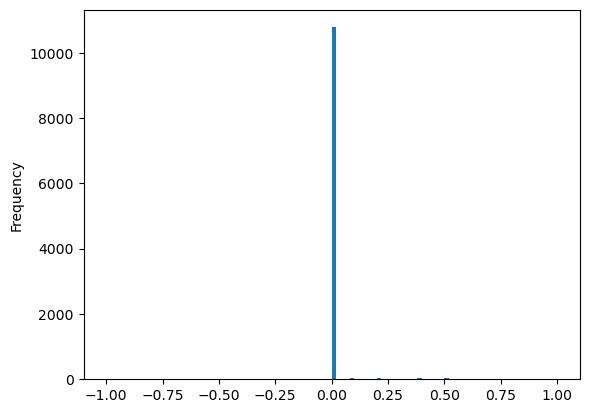

In [57]:
df_2["update_word"].plot(kind="hist", bins=100)

On the basis of sentiment polarity we can get positive, negative and neutral words

In [53]:
pos_df = df_2[df_2.update_word > 0.25]
neg_df = df_2[df_2.update_word < -0.25]
net_df = df_2[df_2.update_word == 0]

In [60]:
positive_words = []
negative_words = []
neutral_words = []

for i in pos_df.words:
    positive_words.append(i)
positive_word = ' '.join(positive_words)

for i in neg_df.words:
    negative_words.append(i)
negative_word = ' '.join(negative_words)

for i in net_df.words:
    neutral_words.append(i)
neutral_word = ' '.join(neutral_words)

In [67]:
neutral_words = neutral_words[:500]

In [68]:
neutral_words

['',
 'tacked',
 '54',
 'catalysts',
 'surpass',
 'face',
 'headed',
 'hear',
 'vegas',
 '591',
 'deck',
 'reduce',
 '30000',
 'humancentric',
 'degeneration',
 'zte',
 'screening',
 'laakso',
 'origin',
 'body',
 'lions',
 'total',
 'tapio',
 'key',
 'neomarkka',
 'silja',
 'pharmacokinetic',
 'railroadcar',
 'depressed',
 'rtch',
 'farmer',
 'commerce',
 'distinguished',
 'utilisation',
 'nokian',
 'ofcramo',
 'carriers',
 'midswaps',
 'codenamed',
 'relacom',
 'files',
 'devices',
 'raffles',
 'extra',
 'qualified',
 'ended',
 'control',
 'year\x88',
 'energia',
 'polled',
 'adjacent',
 'beneficial',
 'comments',
 '678',
 'liter',
 'representing',
 'separated',
 'st',
 'exterior',
 'bertrand',
 '24592',
 'bookings',
 'models',
 'avcomparatives',
 'chemicals',
 'report26',
 'newsroom',
 'veda',
 'telecomworldwire7',
 'eur1bn',
 '1155000',
 'kesko',
 '1830',
 'advise',
 'dpad',
 'attract',
 'shipbuilder',
 'aho',
 'pleasurable',
 'pearl',
 'israel',
 'magazines',
 'display',
 '6594',


In [70]:
df_3 = pd.DataFrame(neutral_words)

In [71]:
df_3.rename(columns = {0:'neutral_words'},inplace = True)

In [72]:
# Extend the list to match the length of the DataFrame
positive_words.extend([None] * (len(df_3) - len(positive_words)))
df_3['positive_words'] = positive_words
negative_words.extend([None] * (len(df_3) - len(negative_words)))
df_3['negative_words'] = negative_words
top_word.extend([None] * (len(df_3) - len(top_word)))
df_3['top_words'] = top_word

In [73]:
df_3.head()

,neutral_words,positive_words,negative_words,top_words
0,,win,approximately,eur
1,tacked,clean,badly,company
2,54,innovative,mean,said
3,catalysts,healthy,troubled,mn
4,surpass,significant,disappointing,finnish


In [74]:
df_3.to_csv('Positive_and_Negative.csv',index = False)

Creating the wordCloud for the positive words

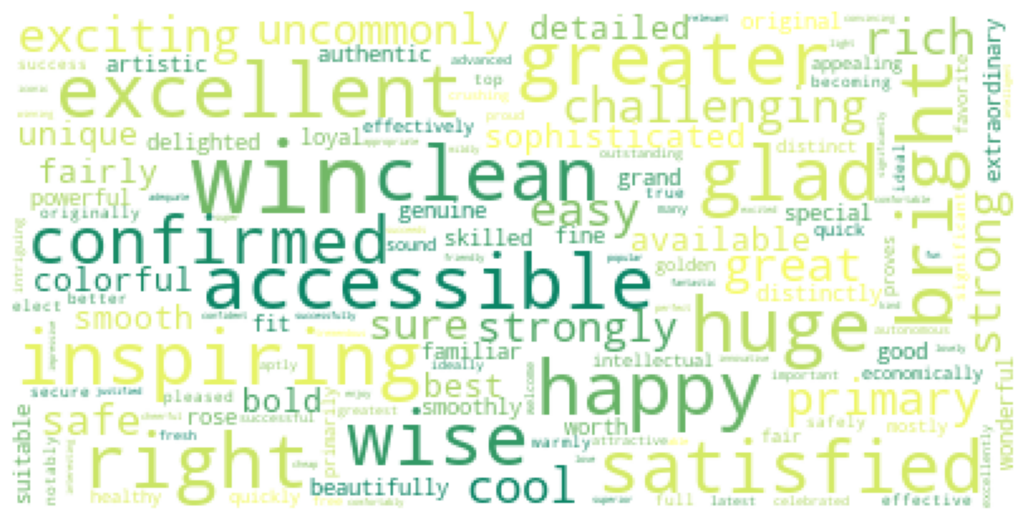

In [60]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(positive_word)

wordcloud = WordCloud(background_color="white",max_words=len(positive_word),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(positive_word)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Creating the wordCloud for the negative words

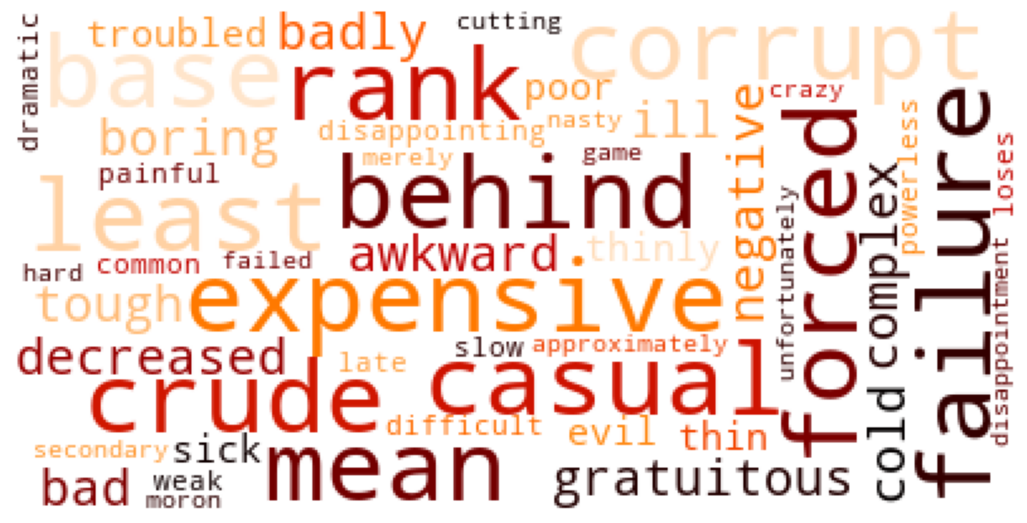

In [61]:
wordcloud = WordCloud().generate(negative_word)

wordcloud = WordCloud(background_color="white",max_words=len(negative_word),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(negative_word)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [62]:
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

Top 20 repeated words

<Axes: title={'center': 'Top 20  single words in cleaned_text'}, xlabel='Comment'>

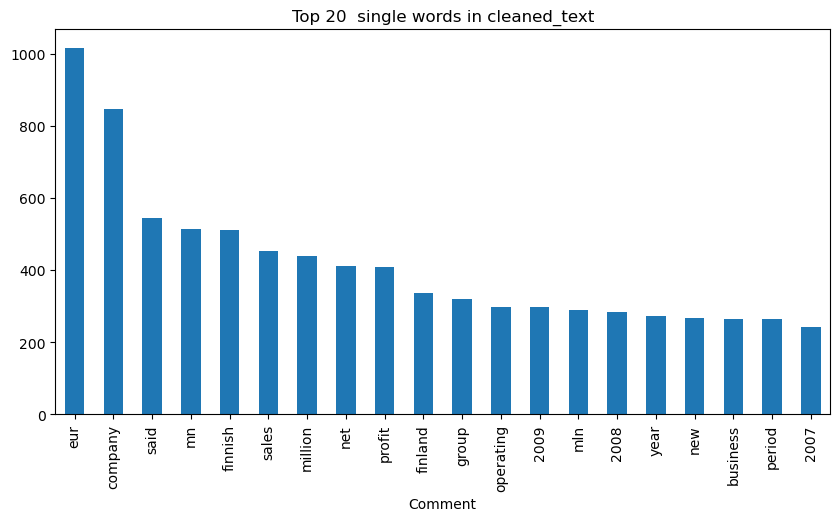

In [63]:
Top_words = top_n_ngram(df_1['Comment'], 20,1)
df1 = pd.DataFrame(Top_words, columns = ['Comment' , 'count'])
plt.figure(figsize =(10,5))
df1.groupby('Comment').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20  single words in cleaned_text')

Top 20 double words

<Axes: title={'center': 'Top 20 Double words in cleaned_text'}, xlabel='Comment'>

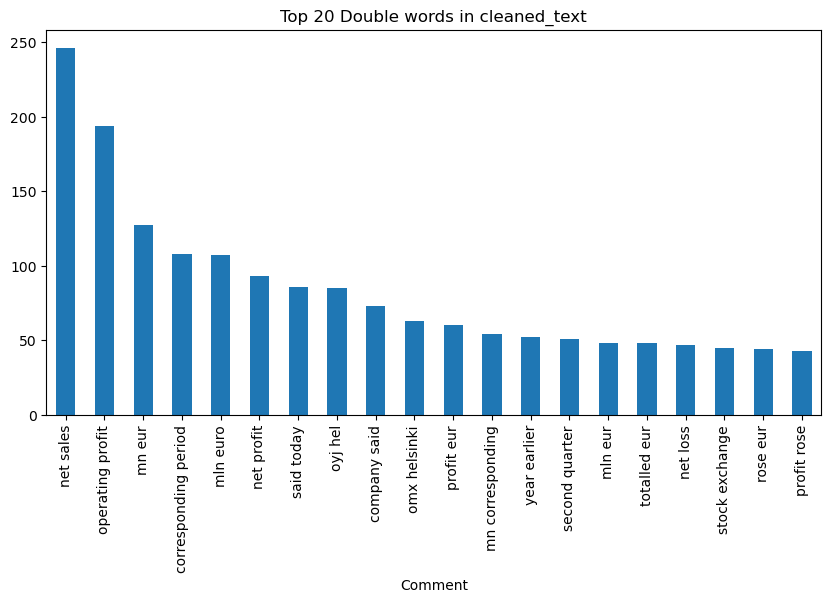

In [64]:
Top_words = top_n_ngram(df['Comment'], 20,2)
df1 = pd.DataFrame(Top_words, columns = ['Comment' , 'count'])
plt.figure(figsize =(10,5))
df1.groupby('Comment').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 Double words in cleaned_text')

Top 20 triple words

<Axes: title={'center': 'Top 20  Triple words in cleaned_text'}, xlabel='Comment'>

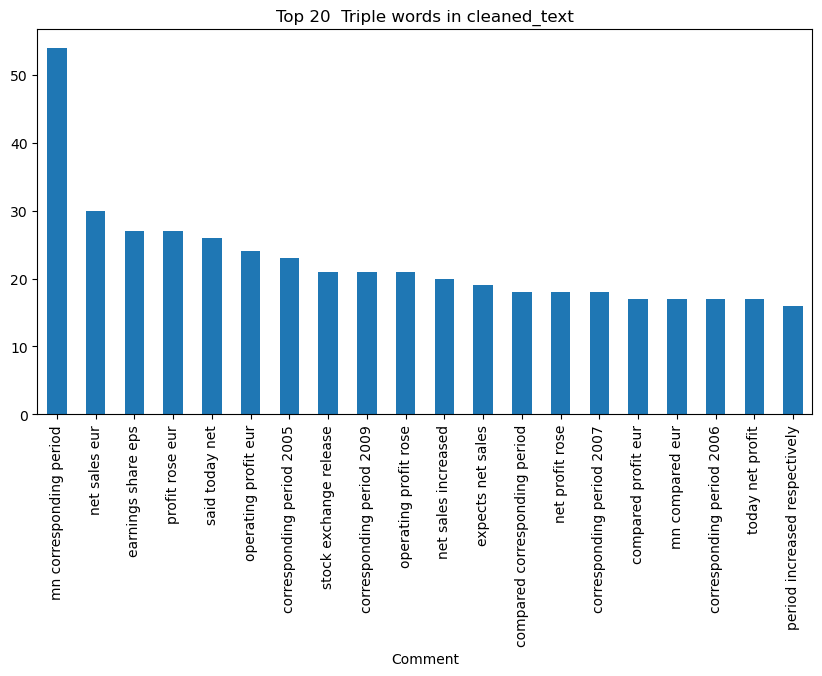

In [65]:
Top_words = top_n_ngram(df['Comment'], 20,3)
df1 = pd.DataFrame(Top_words, columns = ['Comment' , 'count'])
plt.figure(figsize =(10,5))
df1.groupby('Comment').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20  Triple words in cleaned_text')

Converting the superlitive words in base form

In [66]:
from nltk.stem.snowball import SnowballStemmer
snow_stem = SnowballStemmer(language='english')

In [67]:
def stem(text):# "Hey Hi there I am anil"
    filtered = []
    tokenized_word = word_tokenize(text) #[hey,hi,there,i,am,anil]
    for each_word in tokenized_word:
         filtered.append(snow_stem.stem(each_word))  #[hey,hi,i,anil]
    return(" ".join(filtered))

In [68]:
df_1['Comment'] = df['Comment'].apply(stem)

In [69]:
df_1.head()

,expression,Comment,year
0,neutral,technopoli plan develop stage area less 100000...,2009
1,negative,intern electron industri compani elcoteq laid ...,2009
2,positive,new product plant compani would increas capac ...,2009
3,positive,accord compani s updat strategi year 20092012 ...,2009
4,positive,financ aspocomp s growth aspocomp aggress purs...,2009


Adding the length comment in new column

In [70]:
def update(item):
    return len(item)
df_1['Length_of_Comment'] = df_1['Comment'].apply(update)

In [111]:
df_1.head()

,expression,Comment,year,Length_of_Comment,update_comment
0,neutral,technopoli plan develop stage area less 100000...,2009,125,neutral
1,negative,intern electron industri compani elcoteq laid ...,2009,151,negative
2,positive,new product plant compani would increas capac ...,2009,132,positive
3,positive,accord compani s updat strategi year 20092012 ...,2009,129,positive
4,positive,financ aspocomp s growth aspocomp aggress purs...,2009,123,positive


In [112]:
df_1.to_csv("Updated_data.csv",index = False)

Converting the words in numerical values using vectorization

In [72]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_1['Comment'])
y = df_1['expression']

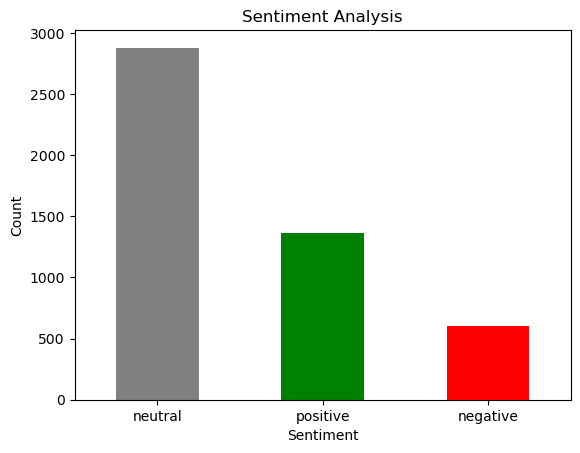

In [73]:
sentiment_counts = df_1['expression'].value_counts()
sentiment_counts.plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

We have inbalance data 

In [74]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [75]:
df_1['update_comment'] = y_resampled

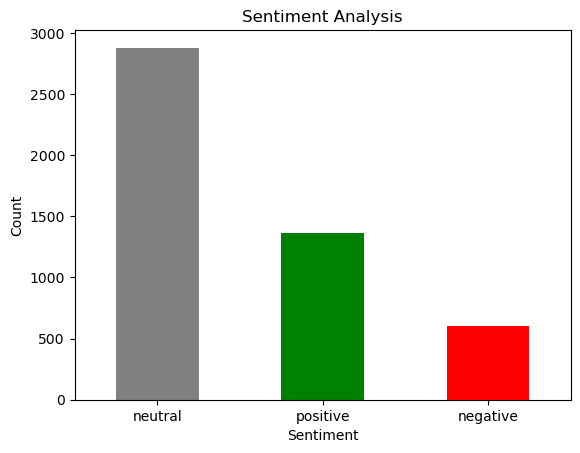

In [76]:
sentiment_counts = df_1['update_comment'].value_counts()
sentiment_counts.plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

To convert imbalance data into balance using smote but it does't do it

In [77]:
df_1.head()

,expression,Comment,year,Length_of_Comment,update_comment
0,neutral,technopoli plan develop stage area less 100000...,2009,125,neutral
1,negative,intern electron industri compani elcoteq laid ...,2009,151,negative
2,positive,new product plant compani would increas capac ...,2009,132,positive
3,positive,accord compani s updat strategi year 20092012 ...,2009,129,positive
4,positive,financ aspocomp s growth aspocomp aggress purs...,2009,123,positive


In [78]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Training the Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = mnb.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6580470860671556
Confusion Matrix:
 [[561  66 241]
 [ 69 683 119]
 [168 223 461]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.65      0.67       868
     neutral       0.70      0.78      0.74       871
    positive       0.56      0.54      0.55       852

    accuracy                           0.66      2591
   macro avg       0.66      0.66      0.66      2591
weighted avg       0.66      0.66      0.66      2591



In [81]:
from sklearn.model_selection import  GridSearchCV

In [82]:
params_mnb = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search_mnb = GridSearchCV(estimator=mnb, param_grid=params_mnb, cv=5, scoring='accuracy')
grid_search_mnb.fit(X_train, y_train)
print("Best parameters for MultinomialNB:", grid_search_mnb.best_params_)
print("Best cross-validation accuracy for MultinomialNB:", grid_search_mnb.best_score_)

Best parameters for MultinomialNB: {'alpha': 0.1}
Best cross-validation accuracy for MultinomialNB: 0.6528179930871663


In [83]:
best_mnb = MultinomialNB(alpha=grid_search_mnb.best_params_['alpha'])
best_mnb.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = mnb.predict(X_test)

In [84]:
# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6580470860671556
Confusion Matrix:
 [[561  66 241]
 [ 69 683 119]
 [168 223 461]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.65      0.67       868
     neutral       0.70      0.78      0.74       871
    positive       0.56      0.54      0.55       852

    accuracy                           0.66      2591
   macro avg       0.66      0.66      0.66      2591
weighted avg       0.66      0.66      0.66      2591



In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Logistic regression is a fundamental statistical method used for binary classification problems, making it highly applicable for sentiment analysis in financial news. In this context, logistic regression can be employed to classify news articles as positive, negative, or neutral based on their textual content.

In [89]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_regression_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression_predictions))

Logistic Regression Accuracy: 0.7279042840602085
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.89      0.79       868
     neutral       0.79      0.73      0.76       871
    positive       0.69      0.56      0.62       852

    accuracy                           0.73      2591
   macro avg       0.73      0.73      0.72      2591
weighted avg       0.73      0.73      0.72      2591



Support Vector Machine (SVM) classification is a robust and efficient machine learning technique particularly suitable for sentiment analysis of financial news. SVM aims to find the optimal hyperplane that best separates the data into different classes. In the context of sentiment analysis, SVM can classify news articles into positive, negative, or neutral sentiment categories.

In [86]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.7159397915862601
SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.86      0.78       868
     neutral       0.69      0.86      0.77       871
    positive       0.77      0.42      0.55       852

    accuracy                           0.72      2591
   macro avg       0.73      0.71      0.70      2591
weighted avg       0.73      0.72      0.70      2591



Decision tree classification is a powerful and intuitive machine learning technique used for categorizing data, making it suitable for sentiment analysis in financial news. In this context, a decision tree can be employed to classify news articles into positive, negative, or neutral sentiment categories based on their textual features

In [87]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, decision_tree_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree_predictions))

Decision Tree Accuracy: 0.6931686607487456
Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.87      0.77       868
     neutral       0.75      0.64      0.69       871
    positive       0.65      0.56      0.60       852

    accuracy                           0.69      2591
   macro avg       0.69      0.69      0.69      2591
weighted avg       0.69      0.69      0.69      2591



Random forest classification is a robust and versatile machine learning technique well-suited for sentiment analysis in financial news. It builds upon the decision tree algorithm by constructing multiple decision trees during training and outputting the mode of the classes (classification) of the individual trees. This ensemble method enhances predictive accuracy and mitigates the risk of overfitting, which is a common issue with single decision trees.

In [88]:
random_forest_model = RandomForestClassifier(n_estimators=100,random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, random_forest_predictions))

Random Forest Accuracy: 0.7151678888460054
Random Forest Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.89      0.79       868
     neutral       0.77      0.66      0.71       871
    positive       0.67      0.59      0.63       852

    accuracy                           0.72      2591
   macro avg       0.72      0.71      0.71      2591
weighted avg       0.72      0.72      0.71      2591



Gradient boosting classification is a powerful machine learning technique particularly effective for tasks such as sentiment analysis of financial news. This method builds an ensemble of decision trees sequentially, where each subsequent tree focuses on correcting the errors made by the previous trees. The process involves minimizing a loss function through gradient descent, which ensures that the model improves with each iteration.

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate the model
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.6873793901968352
              precision    recall  f1-score   support

    negative       0.65      0.90      0.75       868
     neutral       0.74      0.69      0.72       871
    positive       0.69      0.47      0.56       852

    accuracy                           0.69      2591
   macro avg       0.69      0.69      0.68      2591
weighted avg       0.69      0.69      0.68      2591

